# Numerical integration and modelling using ODEs

As a simple warm-up, let us consider the following integral

$\int_0^{10} f(x)\, dx, \quad f(x)=x^2$

This is easily solvable analytically:

$ F(x) = \left[ \frac{1}{3}x^3 \right]^{10}_0 $ = 333.33

### Simple integration (Riemann sum)

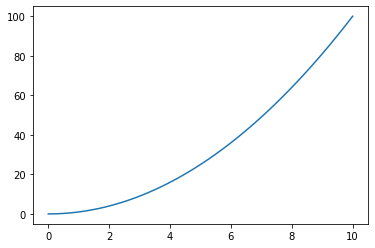

In [1]:
import numpy as np
import matplotlib.pyplot as plt
    
x = np.linspace(0,10,100)
y = x**2
plt.plot(x,y)

In [75]:
dsum = 0
Npt = len(y)
t0 = 0
t1 = 10
dt = (t1 - t0) / Npt

for i in range(Npt):
    dsum += y[i] * dt
dsum

335.01683501683505

## Epidemic model

Let S, I and R, respectively, be the number of susceptible, infected and recovered individuals in a population. Based on simple assumptions, such as a constant population size and time-independent infection rate, the following set of equations can be derived:

$\large \frac{dS}{dt} = -\frac{\beta S I}{N}$

$\large \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I $

$\large \frac{dR}{dt} = \gamma I$

Let us initialise some of these parameters:

In [81]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 0.04
# A grid of time points (in days)
tvec = np.linspace(0, 100, 200)

We can now calculate the derivatives:

In [82]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

## Integrate these variables with Euler's method

In [83]:
t0 = tvec[0]
t1 = tvec[-1]
dt = tvec[1]-tvec[0]

S = S0
I = I0
R = R0

plotvec = []

for t in tvec:
    plotvec.append([S,I,R])    
    dSdt, dIdt, dRdt = deriv([S,I,R],t,N,beta,gamma)
    S += dSdt * dt
    I += dIdt * dt
    R += dRdt * dt

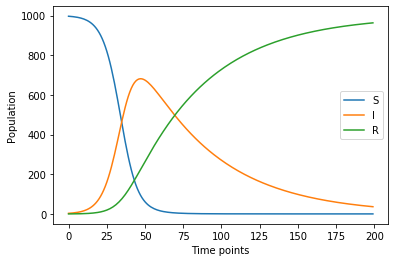

In [88]:
plt.plot(plotvec)
plt.legend(['S','I','R'])
plt.xlabel('Time points')
plt.ylabel('Population')
plt.show()

## Making a function

In [85]:
def Solve_SIR_Model(beta,gamma,tmax,N,I0,R0):
    S0 = N - I0 - R0
    tvec = np.linspace(0, tmax, 200)
    
    t0 = tvec[0]
    t1 = tvec[-1]
    dt = tvec[1]-tvec[0]

    S = S0
    I = I0
    R = R0

    plotvec = []

    for t in tvec:
        plotvec.append([S,I,R])    
        dSdt, dIdt, dRdt = deriv([S,I,R],t,N,beta,gamma)
        S += dSdt * dt
        I += dIdt * dt
        R += dRdt * dt    
        
    return tvec, plotvec

def Plot_SIR(beta,gamma,tmax,N=1000,I0=1,R0=0):
    tvec,plotvec = Solve_SIR_Model(beta,gamma,tmax,N,I0,R0)
    plt.plot(np.array([tvec,tvec,tvec]).T,plotvec)
    plt.legend(['S','I','R'])
    plt.xlabel('Time [days]')
    plt.ylabel('Population')    

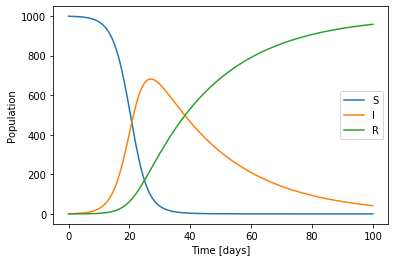

In [86]:
Plot_SIR(0.4,0.04,100)

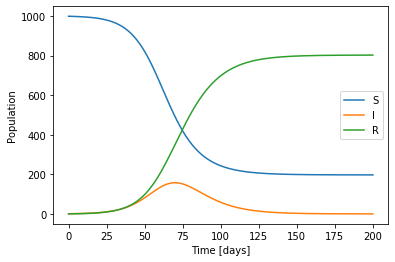

In [87]:
Plot_SIR(0.2,0.1,200)

# Fitting to real data

Pull up-to-date data from `http://data.europa.eu`

In [89]:
import numpy as np
import requests
import pandas as pd
import datetime
import os

today_string = datetime.date.today().strftime("%Y%m%d")
filename = 'data_%s.xlsx' % today_string

if not os.path.isfile(filename):
    # download data for today
    response = requests.get('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
    fid = open(filename,'wb')
    fid.write(response.content)
    fid.close()
    
data = pd.read_excel(filename)

In [90]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8097,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8098,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
8099,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8100,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


Get the UK specific data:

In [91]:
UK_indices = data['countriesAndTerritories'] == 'United_Kingdom'
data[UK_indices]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7724,2020-04-01,1,4,2020,3009,381,United_Kingdom,UK,GBR,66488991.0
7725,2020-03-31,31,3,2020,2619,180,United_Kingdom,UK,GBR,66488991.0
7726,2020-03-30,30,3,2020,2433,209,United_Kingdom,UK,GBR,66488991.0
7727,2020-03-29,29,3,2020,2546,260,United_Kingdom,UK,GBR,66488991.0
7728,2020-03-28,28,3,2020,2885,181,United_Kingdom,UK,GBR,66488991.0
...,...,...,...,...,...,...,...,...,...,...
7812,2020-01-04,4,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7813,2020-01-03,3,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7814,2020-01-02,2,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7815,2020-01-01,1,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0


How does the data look?

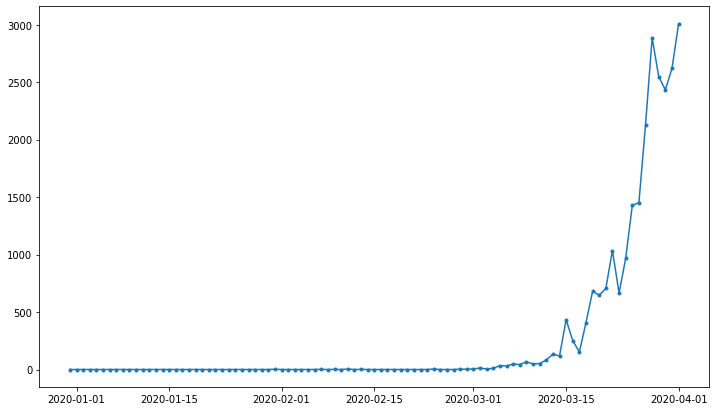

In [92]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
import seaborn
register_matplotlib_converters() # needed for datetime

plt.figure(figsize=(12,7))

UK_data = data[UK_indices]
plt.plot(UK_data['dateRep'], UK_data['cases'],'.-')

Inspect the top rows of the dataframe:

In [93]:
UK_data[['cases']].head()

,cases
7724,3009
7725,2619
7726,2433
7727,2546
7728,2885


Invert the order of this list:

In [94]:
UK_data_srt = UK_data['cases'][::-1]
UK_data_srt.head()

7816    0
7815    0
7814    0
7813    0
7812    0
Name: cases, dtype: int64

In [95]:
UK_data_srt.tail()

7728    2885
7727    2546
7726    2433
7725    2619
7724    3009
Name: cases, dtype: int64

In [96]:
UK_data_srt.cumsum().tail()

7728    14543
7727    17089
7726    19522
7725    22141
7724    25150
Name: cases, dtype: int64

In [97]:
# filter non-zero data
UK_data_srt_nonzero = UK_data_srt[UK_data_srt.cumsum() > 0]
UK_data_srt_nonzero

7785       2
7784       0
7783       0
7782       0
7781       0
        ... 
7728    2885
7727    2546
7726    2433
7725    2619
7724    3009
Name: cases, Length: 62, dtype: int64

In [98]:
cumsum_cases = UK_data_srt_nonzero.cumsum().to_numpy()
tvec = np.array(range(len(cumsum_cases)))

'cumsum_cases:',cumsum_cases,'tvec:',tvec

('cumsum_cases:',
 array([    2,     2,     2,     2,     2,     2,     2,     3,     3,
            4,     4,     8,     8,     9,     9,     9,     9,     9,
            9,     9,     9,     9,     9,     9,    13,    13,    13,
           13,    16,    18,    23,    36,    40,    51,    85,   115,
          163,   206,   273,   321,   373,   456,   590,   707,  1140,
         1391,  1543,  1950,  2630,  3277,  3983,  5018,  5683,  6650,
         8077,  9529, 11658, 14543, 17089, 19522, 22141, 25150],
       dtype=int64),
 'tvec:',
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]))

### Fitting and plotting

In [102]:
# Define function like before but modified

def Plot_I(beta,gamma,tmax,N=1000,I0=1,R0=0):
    tvec,plotvec = Solve_SIR_Model(beta,gamma,tmax,N,I0,R0)
    I_pred = np.array(plotvec)[:,1] # get I column
    plt.plot(tvec,I_pred)
    plt.xlabel('Time [days]')
    plt.ylabel('Population') 

Let's test the function:

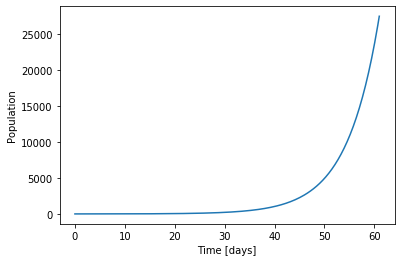

In [103]:
Plot_I(0.2,0.04,tvec[-1],N=60e9,I0=cumsum_cases[0])

Can we find a set of values that fit the data?

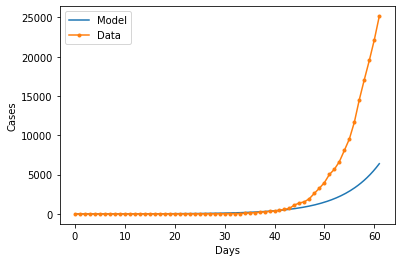

In [104]:
Plot_I(0.15,0.015,tvec[-1],N=60e9,I0=cumsum_cases[0])
plt.plot(tvec,cumsum_cases,'.-')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend(['Model','Data'])

Nope! Try other values.

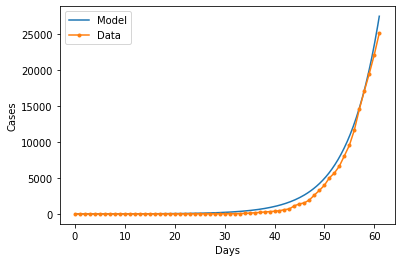

In [117]:
Plot_I(0.2,0.04,tvec[-1],N=60e9,I0=cumsum_cases[0])
plt.plot(tvec,cumsum_cases,'.-')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend(['Model','Data'])

Agreement is decent, but actually we have many local optima - these parameters are completely different:

Text(0, 0.5, 'Cases')

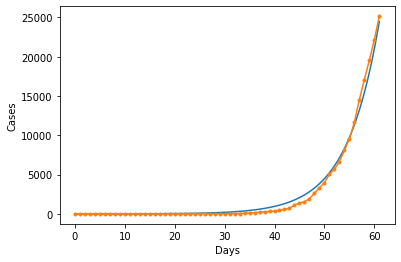

In [124]:
Plot_I(0.42,0.262,tvec[-1],N=60e9,I0=cumsum_cases[0])
plt.plot(tvec,cumsum_cases,'.-')
plt.xlabel('Days')
plt.ylabel('Cases')

We need to consider more data, i.e. the number of recovered, to uniquely fit the parameters.

However, knowing that our predictions are rather uncertain due to this, can we get an idea of when the peak of the number of infected occors? 

Let us plot the predictions for the two above parameters sets over an extended period:

#### Case 1

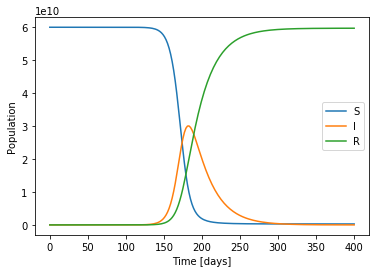

In [107]:
Plot_SIR(0.2,0.04,400,N=60e9,I0=cumsum_cases[0])

#### Case 2

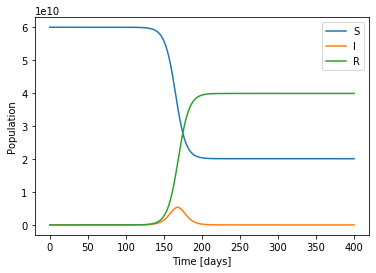

In [125]:
Plot_SIR(0.42,0.262,400,N=60e9,I0=cumsum_cases[0])

In both cases the peak occurs after more than **150 days** and less than **200 days**.

**Some more problems to try:**
- Include data on the number of recovered individuals to make the fitting problem well-posed
- Perform the fitting using a numerical optimisation method (scipy's fmin for instance, akin to fminsearch in Matlab) to determine beta and gamma; requires a well-posed problem to work properly
- Consider what happens to predictions if 'dark figures' (unreported cases) are added to the data; e.g. if the observed numbers are instead doubled, what does the fit say?

#### Optional: requires ipywidgets interact

In [108]:
# from __future__ import print_function
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# @interact(beta=(0.1,0.5,0.001), gamma=(0.1,0.5,0.001))
# def g(beta,gamma):
#     Plot_I(beta,gamma,tvec[-1],N=60e9,I0=cumsum_cases[0])
#     plt.plot(tvec,cumsum_cases,'.-')
#     plt.xlabel('Days')
#     plt.ylabel('Cases')

interactive(children=(FloatSlider(value=0.30000000000000004, description='beta', max=0.5, min=0.1, step=0.001)…

## Endnote

We could also have used a built-in method for solving the ODE 

In [153]:
from scipy.integrate import odeint

# Initial conditions vector
y0 = [S0, I0, R0]
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, tvec, args=(N, beta, gamma))
S, I, R = ret.T

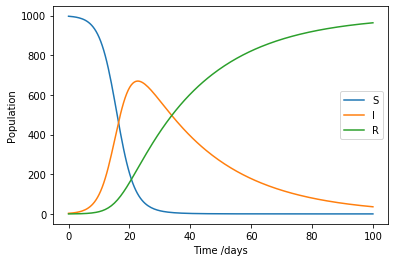

In [154]:
plt.plot(tvec, S)
plt.plot(tvec, I)
plt.plot(tvec, R)
plt.xlabel('Time /days')
plt.ylabel('Population')
plt.legend(['S','I','R'])

##### Finding the beta and gamma parameters by optimisation

One could use an optimisation method to minimise the deviation between or model prediction and the data.

This is unlikely to work well, since we have an ill-posed problem (solutions are not unique), but the below library would be useful:

`from scipy.optimize import minimize`